# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("candyhierarchy2017.xlsx")

<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [4]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [5]:
df.shape

(2460, 120)

In [6]:
df.isnull().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [9]:
df.duplicated().any()

False

In [10]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

In [11]:
#The dataset contains a lot of missing data, but there's no duplicates, we should remove
#some columns and modify other ones' datatypes

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [31]:
df = df.rename(columns={'Q1: GOING OUT?':'GoingOut', 'Q2: GENDER':'Gender', 'Q3: AGE':'Age',
'Q4: COUNTRY':'Country','Q5: STATE, PROVINCE, COUNTY, ETC':'LivingIN', 'Q7: JOY OTHER':'Joy other',
'Q8: DESPAIR OTHER':'Despair other', 'Q9: OTHER COMMENTS':'Other comments',
'Q10: DRESS':'Dress','Q11: DAY':'Day', 'Q12: MEDIA [Science]':'Science',
'Q12: MEDIA [Daily Dish]':'Daily Dish', 'Q12: MEDIA [ESPN]':'ESPN',
'Q12: MEDIA [Yahoo]':'Yahoo'})
df.columns = df.columns.str.strip('Q6 |')
df.head()

,Going out,Gender,Age,Country,State,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,Dress,Day,Science,ESPN,Yahoo,"Click Coordinates (x, y)"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,1.0,NaN,NaN,"(84, 25)"
2,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,MEH,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,1.0,NaN,NaN,"(75, 23)"
4,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,MEH,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,1.0,NaN,NaN,"(70, 10)"


In [22]:
for i in range(len(df.isnull().sum())):
    if df.isna().sum()[i] > 1229:
        print(df.isna().sum().index[i])

ESPN
Yahoo


In [14]:
df.drop(columns=['Joy other','Despair other','Other comments','Unnamed: 113','Daily Dish'],inplace=True)
                 

In [36]:
for col in df.columns:
    print(col)

Going out
Gender
Age
Country
State
100 Grand Bar
Anonymous brown globs that come in black and orange wrappers	(a.k.a. Mary Janes)
Any full-sized candy bar
Black Jacks
Bonkers (the candy)
Bonkers (the board game)
Bottle Caps
Box'o'Raisins
Broken glow stick
Butterfinger
Cadbury Creme Eggs
Candy Corn
Candy that is clearly just the stuff given out for free at restaurants
Caramellos
Cash, or other forms of legal tender
Chardonnay
Chick-o-Sticks (we don’t know what that is)
Chiclets
Coffee Crisp
Creepy Religious comics/Chick Tracts
Dental paraphenalia
Dots
Dove Bars
Fuzzy Peaches
Generic Brand Acetaminophen
Glow sticks
Goo Goo Clusters
Good N' Plenty
Gum from baseball cards
Gummy Bears straight up
Hard Candy
Healthy Fruit
Heath Bar
Hershey's Dark Chocolate
Hershey’s Milk Chocolate
Hershey's Kisses
Hugs (actual physical hugs)
Jolly Rancher (bad flavor)
Jolly Ranchers (good flavor)
JoyJoy (Mit Iodine!)
Junior Mints
Senior Mints
Kale smoothie
Kinder Happy Hippo
Kit Kat
LaffyTaffy
LemonHeads
Lic

In [25]:
df.drop(columns=['Internal ID'],inplace=True)

In [27]:
df.shape

(2460, 114)

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [37]:
df['Going out'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [38]:
df['Going out'].value_counts(dropna=False)

Going out
No     2038
Yes     312
NaN     110
Name: count, dtype: int64

In [39]:
df['Going out'].fillna("I Don't Know",inplace=True)

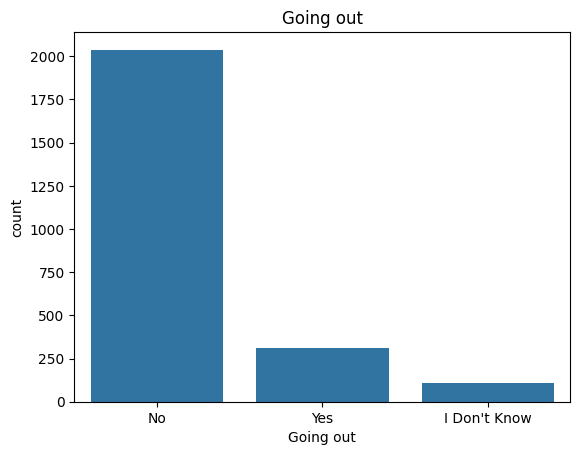

In [40]:
sns.countplot(x = "Going out", data = df, order = df['Going out'].value_counts().index)
plt.title("Going out")
plt.show()

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [41]:
df['Gender'].unique()

array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [42]:
df['Gender'].value_counts(dropna=False)

Gender
Male                  1467
Female                 839
I'd rather not say      83
NaN                     41
Other                   30
Name: count, dtype: int64

In [43]:
df['Gender'].fillna("I'd rather not say", inplace=True)

In [44]:
df['Gender'].replace("Other","I'd rather not say", inplace=True)

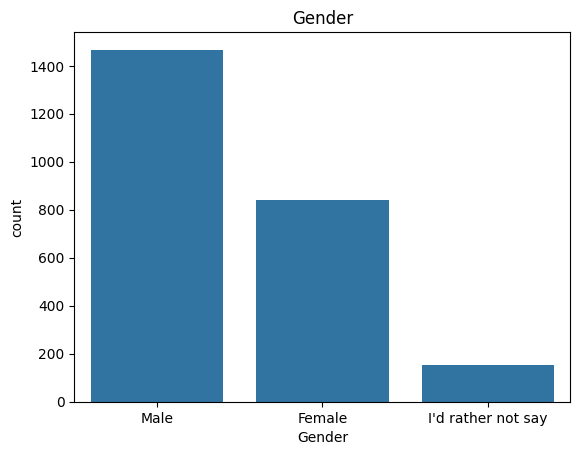

In [45]:
sns.countplot(x = "Gender", data = df, order = df['Gender'].value_counts().index)
plt.title("Gender")
plt.show()

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [46]:
df['Age'].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [47]:
trying = df['Age']
series = pd.Series(trying)
result = pd.to_numeric(series, errors='coerce')

print(result)

0        NaN
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Age, Length: 2460, dtype: float64


In [48]:
df['Age'] = pd.to_numeric(df['Age'],errors='coerce')

In [49]:
df['Age'].isna().sum()

108

In [50]:
average = df['Age'].mean()
df['Age'].fillna(average,inplace=True)

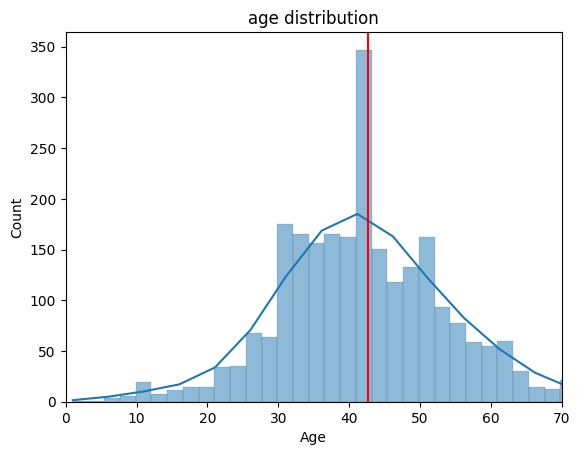

In [51]:
sns.histplot(x = "Age", data = df, kde = True)
plt.axvline(df.Age.mean(), color = "r")
plt.title("age distribution")
plt.xlim(0, 70)
plt.show()

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [52]:
df["Country"].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [53]:
df["Country"] = df["Country"].str.upper()
df["Country"] = df["Country"].str.strip()

In [54]:
df["Country"].isna().sum()

69

In [55]:
df["Country"].fillna("Others",inplace=True)

In [56]:
df["Country"].unique()

array(['Others', 'USA', 'US', 'CANADA', 'MURICA', 'UNITED STATES', 'UK',
       'UNITED KINGDOM', 'UNITED STAES', 'UNITED STATES OF AMERICA',
       'UAE', 'ENGLAND', 'MEXICO', 'U.S.A.', 'USAUSAUSA', 'AMERICA',
       'FRANCE', 'FINLAND', 'UNHINGED STATES', 'US OF A', 'UNITES STATES',
       'THE UNITED STATES', 'NORTH CAROLINA', 'UNIED STATES',
       'NETHERLANDS', 'GERMANY', 'EUROPE', 'EARTH', 'U S', 'U.S.', 'U.K.',
       'COSTA RICA', 'THE UNITED STATES OF AMERICA', 'UNITE STATES',
       'CASCADIA', 'AUSTRALIA', 'INSANITY LATELY', 'GREECE',
       'USA? HARD TO TELL ANYMORE..', "'MERICA", 'USAS', 'PITTSBURGH',
       'UNITED STATE', 'A', 'CAN', 'CANAE', 'NEW YORK', 'TRUMPISTAN',
       'IRELAND', 'UNITED SATES', 'KOREA', 'CALIFORNIA', 'JAPAN',
       'SOUTH AFRICA',
       'I PRETEND TO BE FROM CANADA, BUT I AM REALLY FROM THE UNITED STATES.',
       'ICELAND', 'CANADA`', 'SCOTLAND', 'DENMARK', 'UNITED STATED',
       'SWITZERLAND', 'AHEM....AMERCA', 'UD', 'SOUTH KOREA', 'NEW JER

In [57]:
correct = ["USA", "UNITED STATES", "CANADA", "AMERICA", "UNITED KINGDOM"]

In [62]:
for test in correct:
    matches = process.extract(test, df["Country"], limit = df.shape[0])
    
    for matching in matches:
        if matching[1] >= 80:
            df.loc[df['Country'] == matching[0], 'Country'] = test
            

In [65]:
df["Country"]= df["Country"].str.replace(".","")
df["Country"]= df["Country"].replace(["UNITED STATES", "AMERICA", "NEW JERSEY", "U S A","US OF A",
                                                     "NORTH CAROLINA", "NEW YORK", "USA? HARD TO TELL ANYMORE","USA",
                                                     "MEXICO", "CALIFORNIA"],"USA")
df["Country"]= df["Country"].replace(["UK", "UNITED KINGDOM", "ENDLAND", "FRANCE"], "UK")


In [67]:
df["Country"].value_counts()

Country
USA                               2049
CANADA                             226
Others                              69
UK                                  37
GERMANY                             10
AUSTRALIA                            7
NETHERLANDS                          6
SCOTLAND                             5
JAPAN                                5
IRELAND                              4
SWITZERLAND                          3
DENMARK                              2
HONG KONG                            2
CHINA                                2
SWEDEN                               2
ATLANTIS                             1
INDONESIA                            1
I DON'T KNOW ANYMORE                 1
THE NETHERLANDS                      1
NARNIA                               1
MURRIKA                              1
SOVIET CANUCKISTAN                   1
SINGAPORE                            1
SOUTH KOREA                          1
TAIWAN                               1
SPAIN            

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [69]:
df["State"].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [78]:
df.iloc[:,6:-11].head()

,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),Bottle Caps,Box'o'Raisins,Broken glow stick,Butterfinger,Cadbury Creme Eggs,...,Swedish Fish,Sweetums (a friend to diabetes),Take 5,Tic Tacs,Those odd marshmallow circus peanut things,Three Musketeers,Tolberone something or other,Trail Mix,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein"
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,MEH,...,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,...,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR
4,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,...,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH


In [80]:
arr = df.iloc[:,6:-11]
candy,joy,skipped = [],[],[]
for i in arr:
    candy.append(i[5:])
    joy.append(df[i].value_counts()['JOY'])
    skipped.append(df[i].value_counts()['MEH'])

In [81]:
dd = pd.DataFrame()
dd['col'] = candy
dd['joy']=joy
dd['skipped'] =skipped
dd.sort_values(['joy','skipped'],ascending=[False,False],inplace=True)

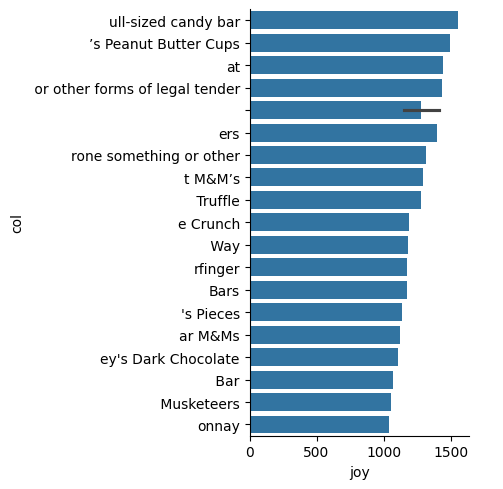

In [85]:
sns.catplot(y='col',x='joy',data=dd[:20],kind='bar',margin_titles=True)
plt.show()

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [86]:
df['Dress'].value_counts()

Dress
White and gold    1081
Blue and black     635
Name: count, dtype: int64

In [87]:
df['Dress'].isna().sum()

744

In [88]:
df["Dress"].fillna("Other colors", inplace = True)

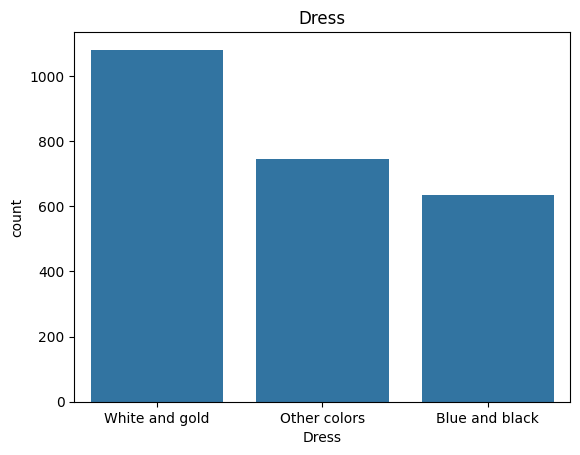

In [89]:
sns.countplot(x = "Dress", data = df, order = df['Dress'].value_counts().index)
plt.title("Dress")
plt.show()

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [90]:
df['Day'].unique()

array([nan, 'Sunday', 'Friday'], dtype=object)

In [92]:
df['Day'].value_counts()

Day
Friday    1091
Sunday     644
Name: count, dtype: int64

In [93]:
df['Day'].fillna("Other Day", inplace = True) 

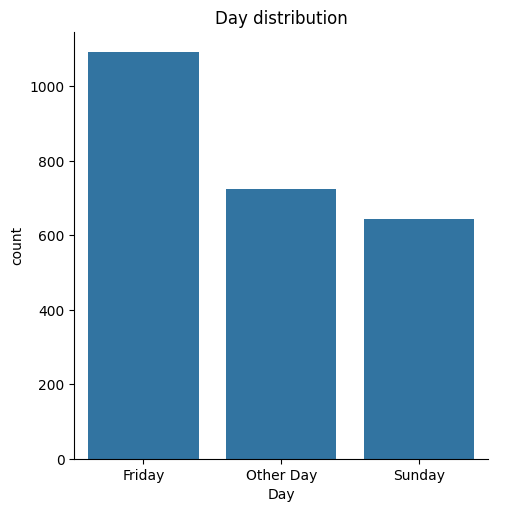

In [95]:
sns.catplot(x = "Day", data = df, order = df["Day"].value_counts().index, kind = "count")
plt.title("Day distribution")
plt.show()

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

### 14 - write a summary about all the cleaning steps 

In [ ]:
#First I tried to understand the dataset and the columns well
#Then I started importing the libs like numpy and pandas,etc...
#and started exploring the data and the Nan values and how to handle them
#then renamed the columns to make it easier while accessing them so I used rename method to
#do it and started to take the columns one by one and clean it from the wrong answers or th
#missing values by using their aroundings then fill the Nan values with them and finally 
#visuallize the output to make it clear and get the answer we need, the whole process
# reapeted for all the columns, I tried to make the process clear as possible while explaining it 